In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

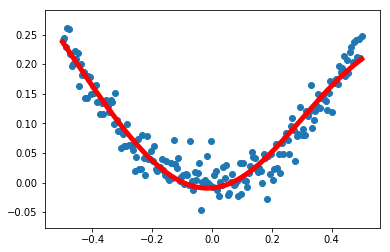

In [14]:
# 使用numpy生成200个随机点（200行）
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
weight_L1 = tf.Variable(tf.random.normal([1,10]))
# 1输入神经元，10是10个神经元【1行10列】
biases_L1 = tf.Variable(tf.zeros([1,10]))
# 矩阵的乘法（x,weight_L1） wx_plus_b_L1信号
wx_plus_b_L1 = tf.matmul(x,weight_L1) + biases_L1
# L1中间层输出 
L1 = tf.nn.tanh(wx_plus_b_L1)


# 定义网络输出层
weight_L2 = tf.Variable(tf.random.normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))

wx_plus_b_L2 = tf.matmul(L1,weight_L2) + biases_L2
prediction = tf.nn.tanh(wx_plus_b_L2)


#二次代价函数

loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()
    